# Imports

In [1]:
import numpy as np
from HodaDatasetReader import read_hoda_dataset
from MinimumDistanceClassifier import MinDistanceClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets

In [2]:
X_train, y_train = read_hoda_dataset(dataset_path='datasets/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

In [3]:
X_test, y_test = read_hoda_dataset(dataset_path='datasets/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)

### Turning one-hot encoded labels in `y_test` into labels from 0 to 9

In [4]:
weights = np.array([0,1,2,3,4,5,6,7,8,9])
labels = []
for row in y_test:
    labels.append([np.dot(weights.T, row)])
y_test = np.array(labels).ravel()

In [5]:
clf = MinDistanceClassifier()

clf.fit(X_train, y_train)

# Minimum distance classifier

## Part **(a)**

### Displaying each label's prototype

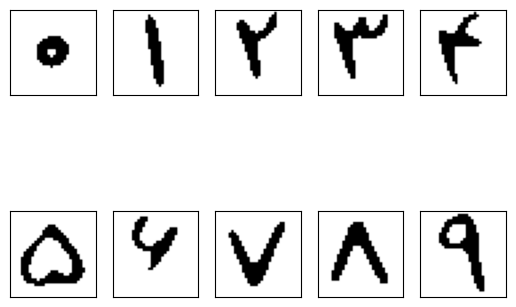

In [15]:
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    class_avg = np.reshape(np.rint(np.array(clf.class_centers_[i][0])), (32,32))
    binary = class_avg > 0
    plt.imshow(binary, cmap='Greys')

## Part **(b)**

### Prediction and evaluation

In [6]:
y_pred = clf.predict(X_test)

#### Confusion Matrix

<Axes: >

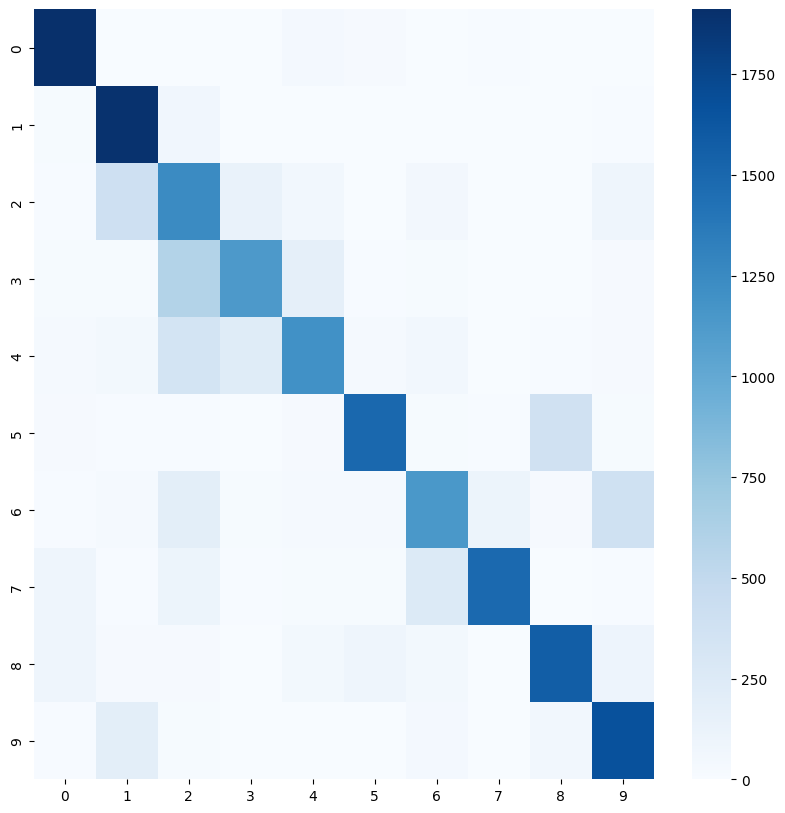

In [8]:
cf_matrix = metrics.cluster.contingency_matrix(labels_true=y_test, labels_pred=y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, fmt='', cmap='Blues')

### Calculate various classification scoring criteria

In [9]:
print(metrics.classification_report(y_test, y_pred, labels=list(range(0,10))))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2000
           1       0.72      0.95      0.82      2000
           2       0.48      0.62      0.54      2000
           3       0.74      0.56      0.64      2000
           4       0.74      0.60      0.66      2000
           5       0.87      0.75      0.81      2000
           6       0.69      0.57      0.63      2000
           7       0.91      0.74      0.82      2000
           8       0.76      0.79      0.77      2000
           9       0.71      0.83      0.77      2000

    accuracy                           0.74     20000
   macro avg       0.75      0.74      0.74     20000
weighted avg       0.75      0.74      0.74     20000



#### Display erroneous predictions 

Actual digits: [3. 7. 6. 4. 2.]
Guessed digits: [2. 6. 9. 2. 1.]


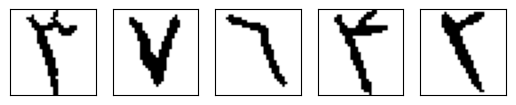

In [11]:
err_mask = (y_pred != y_test)
y_pred_wrong = y_pred[err_mask]
y_wrong = y_test[err_mask]
X_wrong = X_test[err_mask]
random_idx = np.random.randint(low=0, high=X_wrong.shape[0], size=5)
random_subset = X_wrong[random_idx]

for i in range(len(random_subset)):
    plt.subplot(1, 5, i+1)
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    digit = np.reshape(np.rint(np.array(random_subset[i])), (32,32))
    binary = digit > 0
    plt.imshow(binary, cmap='Greys')

print(f'Actual digits: {y_wrong[random_idx]}')
print(f'Guessed digits: {y_pred_wrong[random_idx]}')